#### TransitWindsor is the most popular bus service in Windsor, Ontario, Canada. It is a public transit system that provides bus services to the city's residents and visitors. The service is operated by the Windsor Transit Commission, which is a municipal agency responsible for the planning, operation, and maintenance of the transit system. 

#### A survey was conducted to gather feedback from the residents of Windsor (mainly students) about their transit experiences. The survey was distributed to 50 respondents, and the data was collected and cleaned to prepare for analysis.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#### Data Ingestion

In [2]:
df = pd.read_csv("cleaned_survey_50_responses.csv", encoding='ISO-8859-1')
df.head(4).T

,0,1,2,3
Unnamed: 0,0,1,2,3
ID,1,2,4,5
Start time,2024-11-17 14:39,2024-11-17 16:11,2024-11-19 23:03,2024-11-21 12:59
Completion time,2024-11-17 14:41,2024-11-17 16:15,2024-11-19 23:07,2024-11-21 13:25
Agree to consent info,NaN,NaN,NaN,NaN
usage frequency,Daily,Daily,Daily,Daily
frequent bus taken,1C,Oulette,115,NaN
bus arrival wait time,5 - 10 minutes,5 - 10 minutes,Less than 5 minutes,10 - 20 minutes
MissedBusInstances,Yes,Yes,Yes,Yes
Explanation on MissedBusInstances,Bus was late,NaN,Disappointing but I'm lucky to have another bu...,I waited for one hour for the next bus


#### Data Cleaning

In [3]:
df = df.drop('Unnamed: 0', axis=1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   ID                                 53 non-null     int64 
 1   Start time                         53 non-null     object
 2   Completion time                    53 non-null     object
 3   Agree to consent info              47 non-null     object
 4   usage frequency                    49 non-null     object
 5   frequent bus taken                 47 non-null     object
 6   bus arrival wait time              49 non-null     object
 7   MissedBusInstances                 49 non-null     object
 8   Explanation on MissedBusInstances  22 non-null     object
 9   BusTimelinessPerception            49 non-null     object
 10  app/website helpfulness            49 non-null     object
 11  cleanliness_maintenance_of_buses   49 non-null     object
 12  safety per

In [5]:
# Convert start and completion times to datetime
df['Start time'] = pd.to_datetime(df['Start time'])
df['Completion time'] = pd.to_datetime(df['Completion time'])

In [6]:
df.isnull().sum()

ID                                    0
Start time                            0
Completion time                       0
Agree to consent info                 6
usage frequency                       4
frequent bus taken                    6
bus arrival wait time                 4
MissedBusInstances                    4
Explanation on MissedBusInstances    31
BusTimelinessPerception               4
app/website helpfulness               4
cleanliness_maintenance_of_buses      4
safety perception                     4
value for money                       4
additional feature/service            4
bus_stops_proximity                   4
waiting activity                      4
car_vs_bus                            4
overall experience                    4
survey duration (minutes)             0
dtype: int64

Explanation on MissedBusInstances has the highest number of missing values. We can drop this column as it is not relevant to the analysis. 

The other columns have very few or no missing values. We can keep them as they are.

In [7]:
df['cleanliness_maintenance_of_buses']

0          Good
1          Good
2       Average
3     Excellent
4          Good
5       Average
6           NaN
7     Excellent
8     Excellent
9          Good
10         Good
11         Good
12         Good
13      Average
14    Excellent
15         Good
16         Good
17         Good
18         Good
19      Average
20         Good
21         Good
22         Good
23         Good
24         Poor
25    Excellent
26         Good
27         Good
28      Average
29      Average
30         Good
31    Excellent
32         Good
33      Average
34         Good
35    Excellent
36         Good
37         Good
38          NaN
39      Average
40      Average
41          NaN
42         Good
43         Good
44         Good
45          NaN
46      Average
47      Average
48         Good
49         Good
50         Good
51         Good
52         Good
Name: cleanliness_maintenance_of_buses, dtype: object

In [8]:
df['survey duration (minutes)'] = (df['Completion time'] - df['Start time']).dt.seconds//60

In [9]:
df['ID'] = df['ID'].astype('str')

In [10]:
df['frequent bus taken'].unique()

array(['1C', 'Oulette', '115', nan, '2', '6, 1C, 1A, 4', '8', 'Parent',
       'Bus number 6', '1C and 1A', 'Bus 4', 'TRANSWAY 1C', '2, 8, 1C',
       'Three', '3', '14', 'Bus 115', '4', 'Bus 115, Bus 3', '1c', '8,2',
       '2,115', '1c, 1a,4, 6', '6', '1c and8 wakerVille', '1 C'],
      dtype=object)

### 'Frequent bus taken' column has numerous inputs - created function to only include the bus number


In [11]:
import re

def frequent_buses():
    buses = list(df['frequent bus taken'])

    # to seperate each word
    lst = []
    for i in buses:
        if type(i) == str:  
            sep = re.split(r'[,\s]',i)
            lst.extend(sep)

    # to remove unwanted words
    new_list = []
    for item in lst:
        if item not in ['and','','Bus','number']:
            new_list.append(item)
    
    return new_list

In [12]:
df.loc[df['frequent bus taken'] == 'Three','frequent bus taken'] = '3'
df.loc[df['frequent bus taken'] == '1c and8 wakerVille','frequent bus taken'] = '1C and 8 wakerVille'
df.loc[df['frequent bus taken'] == '1 C','frequent bus taken'] = '1C'
df.loc[df['frequent bus taken'] == '1a','frequent bus taken'] = '1A'

In [13]:
# change to series for analysis
all_buses = frequent_buses()
all_buses = pd.Series(data=all_buses)

In [14]:
all_buses.value_counts()

115           14
1C            12
4              8
2              5
6              4
3              4
8              4
1c             3
1A             2
Oulette        1
Parent         1
TRANSWAY       1
14             1
1a             1
wakerVille     1
Name: count, dtype: int64

In [15]:
all_buses = all_buses.replace('1a', '1A')
all_buses = all_buses.replace('1c', '1C')

In [16]:
all_buses_sorted = all_buses.value_counts()
all_buses_sorted

1C            15
115           14
4              8
2              5
6              4
3              4
8              4
1A             3
Oulette        1
Parent         1
TRANSWAY       1
14             1
wakerVille     1
Name: count, dtype: int64

#### Data Visualization and Analysis

In [17]:
df.columns

Index(['ID', 'Start time', 'Completion time', 'Agree to consent info',
       'usage frequency', 'frequent bus taken', 'bus arrival wait time',
       'MissedBusInstances', 'Explanation on MissedBusInstances',
       'BusTimelinessPerception', 'app/website helpfulness',
       'cleanliness_maintenance_of_buses', 'safety perception',
       'value for money', 'additional feature/service', 'bus_stops_proximity',
       'waiting activity', 'car_vs_bus', 'overall experience',
       'survey duration (minutes)'],
      dtype='object')

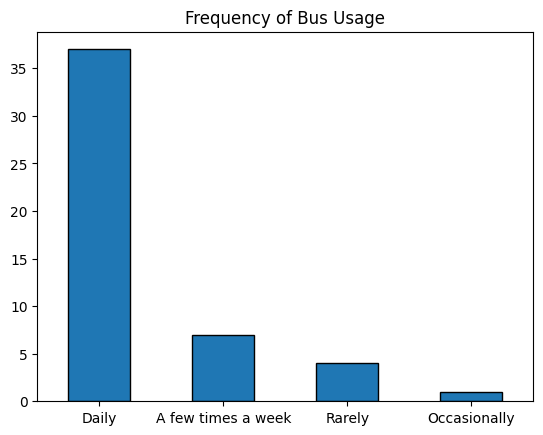

In [18]:
# Distribution of Bus Usage
df['usage frequency'].value_counts().plot(kind='bar',edgecolor='black')
plt.xticks(rotation=0)
plt.title('Frequency of Bus Usage')
plt.xlabel('')
plt.show()

Most of the respondents use the bus daily.

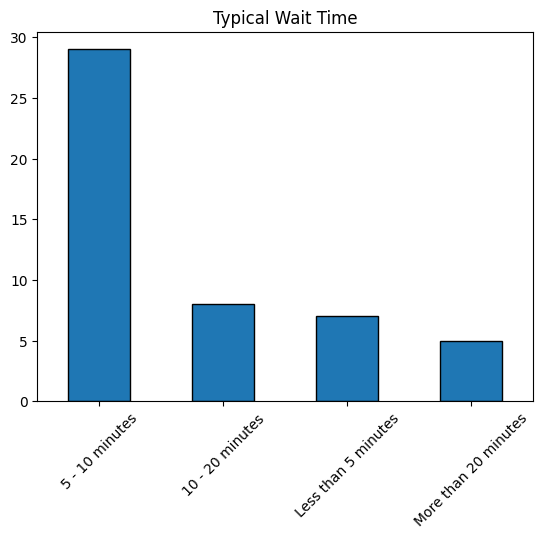

In [19]:
# typical wait times
df['bus arrival wait time'].value_counts().plot(kind='bar',edgecolor='black')
plt.xticks(rotation=0)
plt.title('Typical Wait Time')
plt.xlabel('')
plt.xticks(rotation=45)
plt.show()


While most of the respondents wait for the bus for less than 10 minutes, there are a number of respondents who wait for more than 10 minutes.

In [20]:
# percentage of respondents who experienced missed buses
value_counts = df['MissedBusInstances'].value_counts()
percentage = value_counts / len(df) * 100
percentage


MissedBusInstances
Yes    62.264151
No     30.188679
Name: count, dtype: float64

more than 50% of the respondents experienced missed buses.


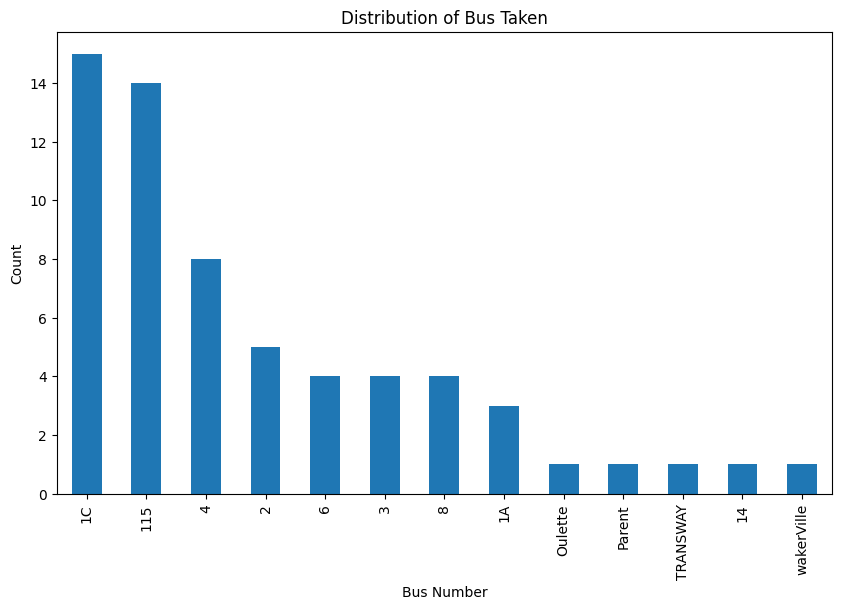

In [21]:
plt.figure(figsize=(10, 6))
all_buses_sorted.plot(kind='bar')
plt.title('Distribution of Bus Taken')
plt.xlabel('Bus Number')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

Bus 1C apears to be the most popular bus route in Windsor, Ontario, Canada.

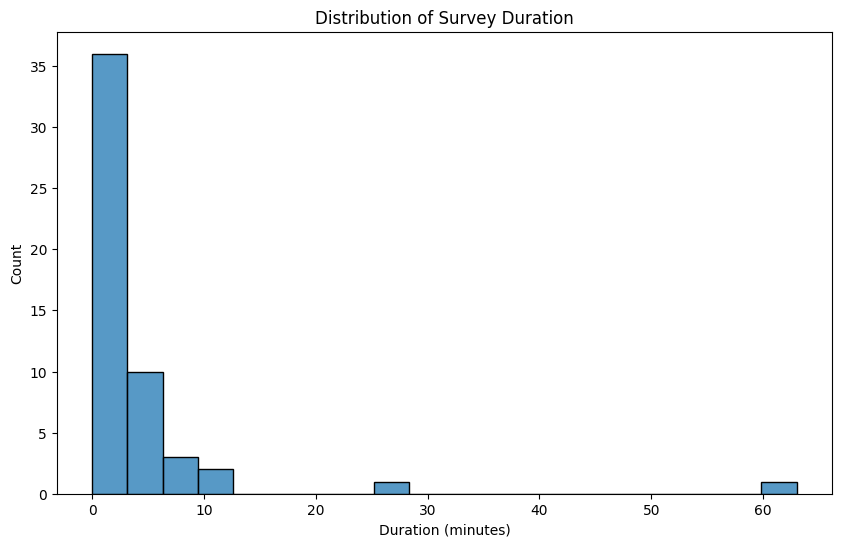

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='survey duration (minutes)', bins=20)
plt.title('Distribution of Survey Duration')
plt.xlabel('Duration (minutes)')
plt.ylabel('Count')
plt.show()

Majority of the respondents took the survey within 10 minutes.

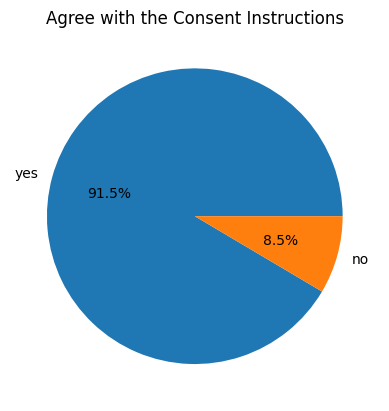

In [23]:
df['Agree to consent info'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('Agree with the Consent Instructions')
plt.ylabel('')
plt.show()

Most of the respondents agreed to the consent instructions. This is important to note as we are also interested in how respondents respond to the consent instructions.

In [24]:
df['BusTimelinessPerception'].value_counts()

BusTimelinessPerception
Often        26
Sometimes    13
Always        6
Rarely        4
Name: count, dtype: int64

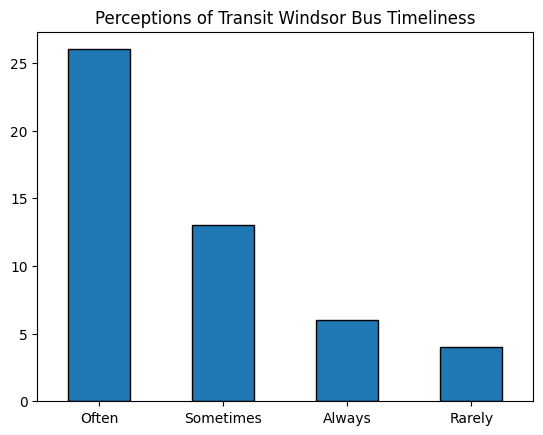

In [25]:
df['BusTimelinessPerception'].value_counts().plot(kind='bar',edgecolor='black')
plt.xticks(rotation=0)
plt.title('Perceptions of Transit Windsor Bus Timeliness')
plt.xlabel('')
plt.show()

Perception of Transit Windsor Bus Timeliness is a bit mixed. While some respondents think the buses run on time, others think they don't.


In [26]:
pd.crosstab(df['overall experience'], df['MissedBusInstances'])

MissedBusInstances,No,Yes
overall experience,,
Average,4,5
Excellent,3,5
Good,9,21
Poor,0,2


While we see that the respondents who experienced missed buses have a more negative overall experience (poor), it is interesting to see that majority of the respondents who rated their experience as good have experienced missed buses.


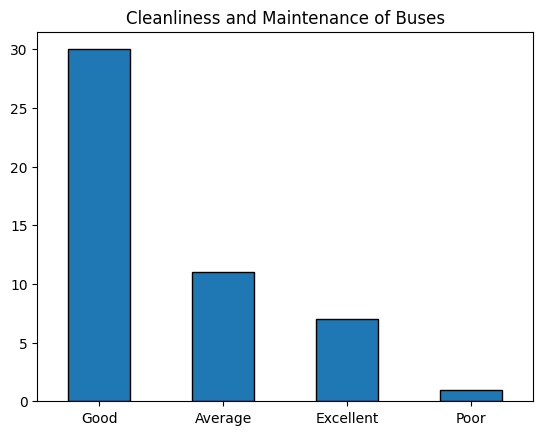

In [27]:
# cleanliness and maintenance of buses
df['cleanliness_maintenance_of_buses'].value_counts().plot(kind='bar',edgecolor='black')
plt.xticks(rotation=0)
plt.title('Cleanliness and Maintenance of Buses')
plt.xlabel('')
plt.show()

Most of the respondents rated the cleanliness and maintenance of buses as JUST good.


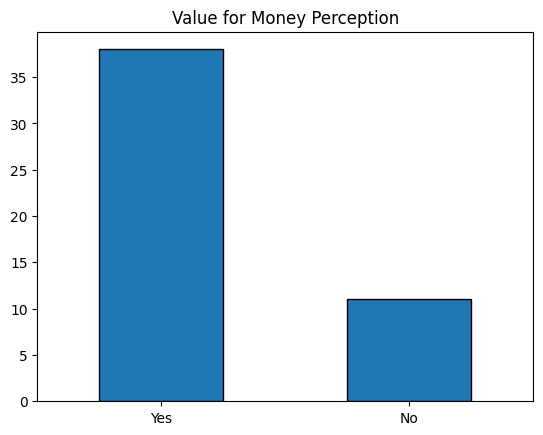

In [28]:
# value for money perception
df['value for money'].value_counts().plot(kind='bar',edgecolor='black')
plt.xticks(rotation=0)
plt.title('Value for Money Perception')
plt.xlabel('')
plt.show()

Most of the respondents state that the bus service is good value for money. However, a number of respondents do not feel this way.


In [29]:
not_good_Value_for_money = df[df['value for money'] == 'No']
not_good_Value_for_money[['overall experience','MissedBusInstances', 'cleanliness_maintenance_of_buses', 'BusTimelinessPerception', 'frequent bus taken']]


,overall experience,MissedBusInstances,cleanliness_maintenance_of_buses,BusTimelinessPerception,frequent bus taken
5,Average,No,Average,Sometimes,115
9,Average,Yes,Good,Often,Parent
13,Average,No,Average,Sometimes,Bus number 6
22,Average,Yes,Good,Rarely,NaN
23,Good,Yes,Good,Often,14
32,Good,Yes,Good,Always,1c
39,Poor,Yes,Average,Rarely,3
40,Poor,Yes,Average,Rarely,4
43,Average,Yes,Good,Often,115
46,Average,No,Average,Often,115


Further analysis needs to be done on the respondents who rated the value for money as no. This might prove helpful especially in the context of the coming fare increase. 
